In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_table('C:/Users/kosuke/en/clustering/train.tsv',index_col=0)

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [3]:
df.head()

,class,buying,maint,doors,persons,lug_boot,safety
id,,,,,,,
0,unacc,low,med,3,2,small,low
3,acc,low,high,3,more,small,med
7,unacc,vhigh,high,5more,2,small,med
11,acc,high,high,3,more,big,med
12,unacc,high,high,3,2,med,high


In [4]:
df.shape

(864, 7)

In [5]:
np.unique(df['class'])

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [6]:
classes = df['class']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 1726
Data columns (total 7 columns):
class       864 non-null object
buying      864 non-null object
maint       864 non-null object
doors       864 non-null object
persons     864 non-null object
lug_boot    864 non-null object
safety      864 non-null object
dtypes: object(7)
memory usage: 54.0+ KB


In [8]:
df = df.drop(['class'], 1)

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety
id,,,,,,
0,low,med,3,2,small,low
3,low,high,3,more,small,med
7,vhigh,high,5more,2,small,med
11,high,high,3,more,big,med
12,high,high,3,2,med,high


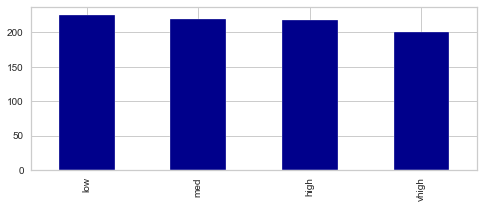

In [45]:
df['buying'].value_counts().plot.bar(figsize=(8, 3), color='darkblue')

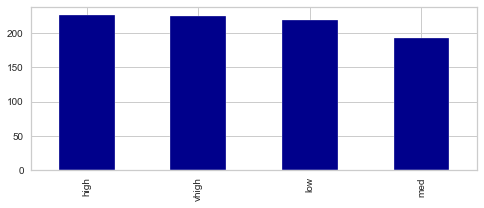

In [46]:
df['maint'].value_counts().plot.bar(figsize=(8, 3), color='darkblue')

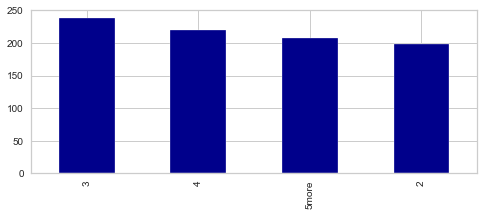

In [47]:
df['doors'].value_counts().plot.bar(figsize=(8, 3), color='darkblue')

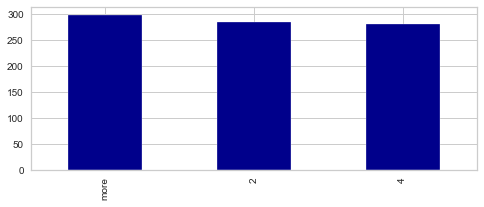

In [48]:
df['persons'].value_counts().plot.bar(figsize=(8, 3), color='darkblue')

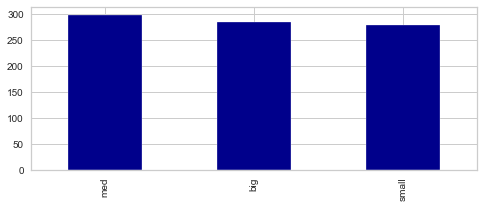

In [50]:
df['lug_boot'].value_counts().plot.bar(figsize=(8, 3), color='darkblue')

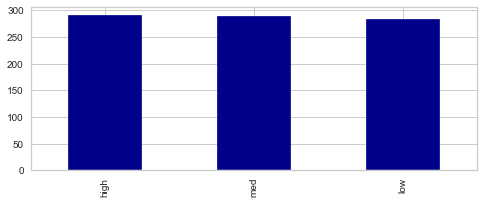

In [51]:
df['safety'].value_counts().plot.bar(figsize=(8, 3), color='darkblue')

# Clustering

In [16]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=4, init='Huang', n_init=100, max_iter=300)

In [17]:
clusters = km.fit_predict(df)

In [18]:
#クラスタ重心
print(km.cluster_centroids_)

[['low' 'low' '5more' '2' 'big' 'low']
 ['med' 'med' '3' '4' 'med' 'high']
 ['high' 'vhigh' '3' '2' 'small' 'med']
 ['low' 'high' '4' 'more' 'big' 'med']]


In [20]:
label = classes.map({
    'unacc':0, 
    'acc': 3, 
    'good': 1,
    'vgood':2  
})

In [21]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(label, clusters)
print(acc)

0.3773148148148148


In [28]:
df['clusters'] = clusters

In [24]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,clusters
id,,,,,,,
0,low,med,3,2,small,low,0
3,low,high,3,more,small,med,3
7,vhigh,high,5more,2,small,med,2
11,high,high,3,more,big,med,3
12,high,high,3,2,med,high,1


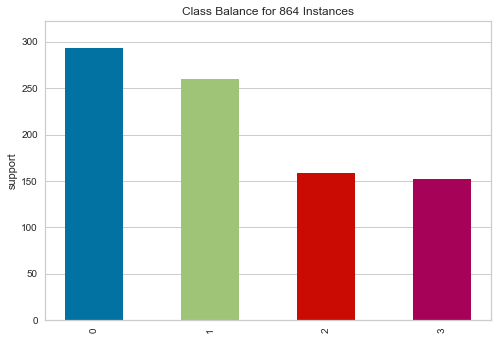

In [32]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(df['clusters'])
plt.xticks(rotation=90)
visualizer.poof()

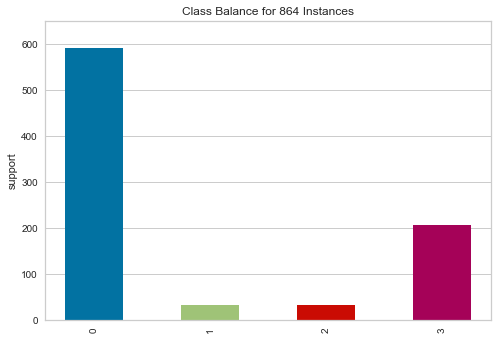

In [34]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(label)
plt.xticks(rotation=90)
visualizer.poof()